In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
minst = keras.datasets.mnist # Keras datasets

In [4]:
(train_features, train_labels), (test_features, test_labels) = minst.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_features.shape # 60000 images at 28x28 size

(60000, 28, 28)

In [7]:
test_features.shape

(10000, 28, 28)

5


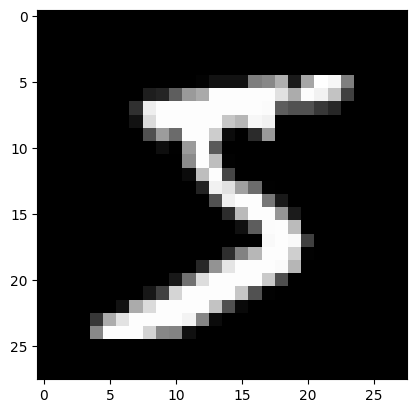

In [11]:
idx = 0 # change thsi number run and see what number it would be
img = train_features[0]

print(train_labels[idx]) # make sire it is 5

plt.gray() # show black and white
plt.imshow(img)

In [12]:
# Preprocessing
np.min(img), np.max(img) # make sure are data are from 0 to 255

(np.uint8(0), np.uint8(255))

In [13]:
train_features = train_features/255.0
test_features = test_features/255.0

In [14]:
# model definition
# Flatten layer get the matrice and change them to flat or on edimention
model = keras.Sequential()
model.add(keras.layers.Flatten()),
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='softmax'))


In [15]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])

In [17]:
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,504 (521.50 KB)

 Trainable params: 133,504 (521.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist = model.fit(train_features, train_labels, epochs=10, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6873 - loss: 1.3256 - val_accuracy: 0.9380 - val_loss: 0.2191
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9407 - loss: 0.2067 - val_accuracy: 0.9517 - val_loss: 0.1602
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9584 - loss: 0.1400 - val_accuracy: 0.9638 - val_loss: 0.1161
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9713 - loss: 0.0996 - val_accuracy: 0.9684 - val_loss: 0.1008
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9774 - loss: 0.0783 - val_accuracy: 0.9720 - val_loss: 0.0920
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9815 - loss: 0.0634 - val_accuracy: 0.9725 - val_loss: 0.0864
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9829 - loss: 0.0566 - val_accuracy: 0.9738 - val_loss: 0.0857
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9867 - loss: 0.0442 - val_accuracy:

In [19]:
model.evaluate(test_features, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0948


[0.07950138300657272, 0.9761999845504761]

In [22]:
# predict first we see the observed image
idx = 100
img = test_features[idx]
print(test_labels[idx])

6


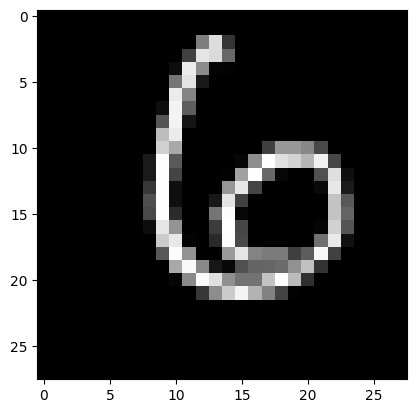

In [23]:
# Now see if the model also predict6
plt.gray()
plt.imshow(img)

In [31]:
test_data = np.reshape(img, (-1, 28, 28))  # batch size of 1, 28x28 image
model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.81008836e-05, 5.73529713e-09, 1.62979049e-07, 2.75571232e-09,
        5.54870567e-08, 1.89292894e-06, 9.99978185e-01, 2.51423082e-09,
        1.67024746e-06, 1.68045122e-09, 2.08625464e-10, 1.01813911e-10,
        1.21032531e-10, 1.50949253e-10, 8.73968883e-11, 5.42246803e-11,
        1.41472146e-11, 2.16359305e-10, 2.13016341e-10, 6.80132478e-11,
        3.26476797e-11, 2.11376264e-11, 1.52006029e-11, 7.62430258e-11,
        8.05903053e-11, 3.66631100e-11, 7.66267397e-11, 5.36673102e-11,
        3.84114719e-11, 1.12271421e-10, 1.47945423e-11, 3.01854687e-11,
        3.41128202e-11, 1.00958937e-11, 3.15035012e-11, 3.49211181e-11,
        7.94606603e-11, 4.79371577e-11, 1.60848390e-10, 2.75900709e-11,
        3.99628004e-11, 1.80146002e-11, 1.42862999e-10, 6.47858633e-12,
        2.78683882e-10, 2.16289153e-10, 4.75581206e-11, 1.67544811e-10,
        8.30725766e-11, 9.40323513e-11, 1.69528183e-10, 1.54003116e-10,
        5.11568177e-10, 1.25878405e-10, 1.61900337e-11, 1.091277

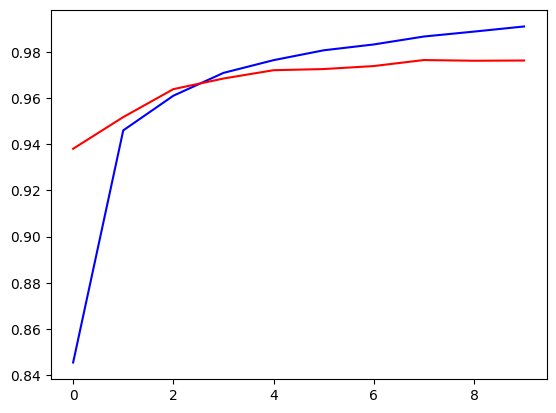

In [32]:
# Accuracy
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.show()